In [58]:
import pandas as pd

df = pd.read_csv("Merged_Microplastic_Data.csv")


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            607 non-null    int64  
 1   DOI                                   607 non-null    object 
 2   Sample_ID                             607 non-null    object 
 3   Location                              458 non-null    object 
 4   Countries                             458 non-null    object 
 5   Source                                607 non-null    object 
 6   Concentration                         601 non-null    object 
 7   Concentration_Units                   601 non-null    object 
 8   Approximate_Latitude                  452 non-null    float64
 9   Approximate_Longitude                 452 non-null    float64
 10  Sample_device_and_deployment_methods  586 non-null    object 
 11  Digestion          

In [61]:
df.isnull().sum()

Unnamed: 0                                0
DOI                                       0
Sample_ID                                 0
Location                                149
Countries                               149
Source                                    0
Concentration                             6
Concentration_Units                       6
Approximate_Latitude                    155
Approximate_Longitude                   155
Sample_device_and_deployment_methods     21
Digestion                                21
Filtration                               21
Filter_Size                              21
Microplastic_Identification_Method       21
Spectral_Analysis                        21
Controls                                 21
dtype: int64

In [62]:
# Here all non-numaric values were removed 
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

In [63]:
# We droped location column becasue be we are focusing on countries. We droped null values from Countries . We dropped the Approximate_Latitude'
# and 'Approximate_Longitude columns because they are not relevant to our analysis. We dropped the 'Sample_device_and_deployment_methods' 
# column because it is not relevant to our analysis. We dropped null values from the 'Concentration' column.

df = df.drop(columns=['Location'])
df = df.dropna(subset=['Countries'])
df = df.drop(columns=['Approximate_Latitude', 'Approximate_Longitude'])
df = df.drop(columns=['Sample_device_and_deployment_methods'])
df = df.dropna(subset=['Concentration'])
df.dropna(subset=['Digestion', 'Filtration', 'Filter_Size', 'Microplastic_Identification_Method', 'Spectral_Analysis', 'Controls'], inplace=True)


In [72]:
df

,Unnamed: 0,DOI,Sample_ID,Countries,Source,Concentration,Concentration_Units,Digestion,Filtration,Filter_Size,Microplastic_Identification_Method,Spectral_Analysis,Controls
0,0,10.1016/j.watres.2017.11.011,1|10.1016/j.watres.2017.11.011,Germany,bottled water,14.0,particles/L,Not Provided,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
1,1,10.1016/j.watres.2017.11.011,2|10.1016/j.watres.2017.11.011,Germany,bottled water,118.0,particles/L,Not Provided,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
2,2,10.1016/j.watres.2017.11.011,3|10.1016/j.watres.2017.11.011,Germany,bottled water,50.0,particles/L,Not Provided,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
3,3,10.1016/j.watres.2017.11.011,4|10.1016/j.watres.2017.11.011,Germany,bottled water,11.0,particles/L,Not Provided,polycarbonate filter,3 um,"Single Particle Explorer (SPE, rapID, Berlin)",Raman,Blank filters run through Raman
5,5,10.1039/c6ay01184e,2|10.1039/c6ay01184e,Germany,bottled water,1.0,particles/0.33 L,Not Provided,Cellulose nitrate,0.45 um,Raman scattering spectroscopy,Raman,Already analyzes sample filtered a second time...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,10.1016/j.scitotenv.2021.148001,Spr|10.1016/j.scitotenv.2021.148001,China,tap water,390.0,particles/m3,H2O2,Glass fiber,Not Provided,Not Provided,Not Provided,Plastic equiptment minimized
603,603,10.1016/j.scitotenv.2021.148001,Sum|10.1016/j.scitotenv.2021.148001,China,tap water,360.0,particles/m3,H2O2,Glass fiber,Not Provided,Not Provided,Not Provided,Plastic equiptment minimized
604,604,10.1016/j.scitotenv.2021.148001,Aut|10.1016/j.scitotenv.2021.148001,China,tap water,750.0,particles/m3,H2O2,Glass fiber,Not Provided,Not Provided,Not Provided,Plastic equiptment minimized
605,605,10.1016/j.scitotenv.2021.148001,Win|10.1016/j.scitotenv.2021.148001,China,tap water,540.0,particles/m3,H2O2,Glass fiber,Not Provided,Not Provided,Not Provided,Plastic equiptment minimized


In [64]:
df.isnull().sum()

Unnamed: 0                            0
DOI                                   0
Sample_ID                             0
Countries                             0
Source                                0
Concentration                         0
Concentration_Units                   0
Digestion                             0
Filtration                            0
Filter_Size                           0
Microplastic_Identification_Method    0
Spectral_Analysis                     0
Controls                              0
dtype: int64

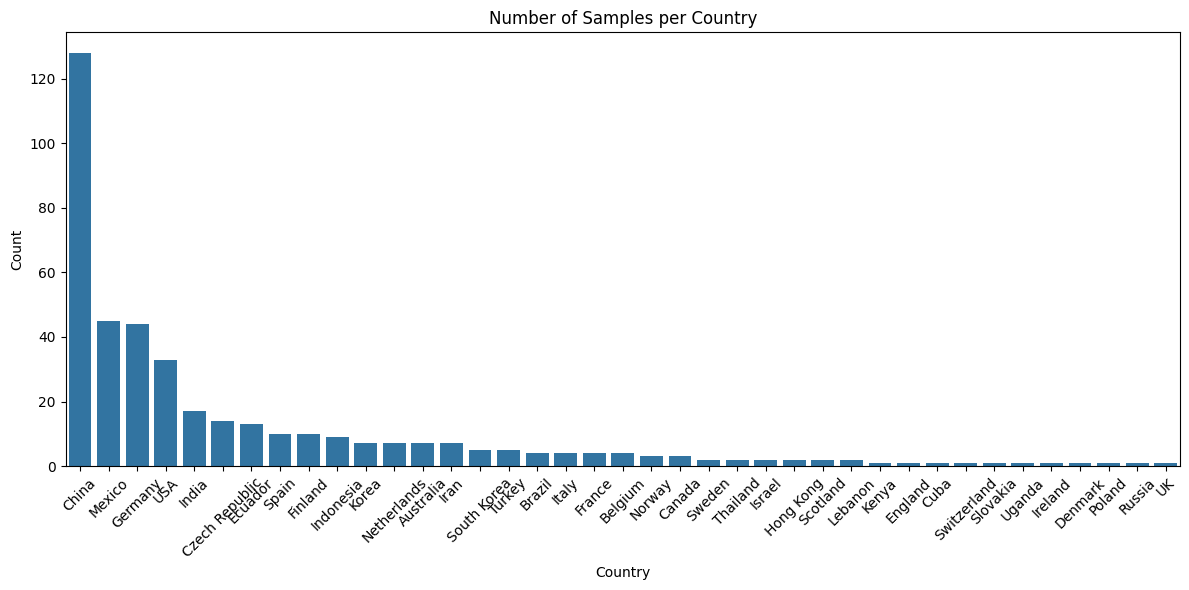

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Countries', order=df['Countries'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Number of Samples per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



In [67]:
df['Countries'].value_counts()

Countries
China             128
Mexico             45
Germany            44
USA                33
India              17
Czech Republic     14
Ecuador            13
Spain              10
Finland            10
Indonesia           9
Korea               7
Netherlands         7
Australia           7
Iran                7
South Korea         5
Turkey              5
Brazil              4
Italy               4
France              4
Belgium             4
Norway              3
Canada              3
Sweden              2
Thailand            2
Israel              2
Hong Kong           2
Scotland            2
Lebanon             2
Kenya               1
England             1
Cuba                1
Switzerland         1
Slovakia            1
Uganda              1
Ireland             1
Denmark             1
Poland              1
Russia              1
UK                  1
Name: count, dtype: int64

In [42]:
print(df.head())


Empty DataFrame
Columns: [Unnamed: 0, DOI, Sample_ID, Countries, Source, Concentration, Concentration_Units, Digestion, Filtration, Filter_Size, Microplastic_Identification_Method, Spectral_Analysis, Controls]
Index: []


In [3]:
df.columns

Index(['Unnamed: 0', 'DOI', 'Sample_ID', 'Location', 'Countries', 'Source',
       'Concentration', 'Concentration_Units', 'Approximate_Latitude',
       'Approximate_Longitude', 'Sample_device_and_deployment_methods',
       'Digestion', 'Filtration', 'Filter_Size',
       'Microplastic_Identification_Method', 'Spectral_Analysis', 'Controls'],
      dtype='object')

In [4]:
# For Concentration
missing_concentration = df[df['Concentration'].isnull()]
print("Rows with missing Concentration:")
print(missing_concentration)

# For Concentration_Units
missing_units = df[df['Concentration_Units'].isnull()]
print("Rows with missing Concentration_Units:")
[missing_units]

Rows with missing Concentration:
Empty DataFrame
Columns: [Unnamed: 0, DOI, Sample_ID, Location, Countries, Source, Concentration, Concentration_Units, Approximate_Latitude, Approximate_Longitude, Sample_device_and_deployment_methods, Digestion, Filtration, Filter_Size, Microplastic_Identification_Method, Spectral_Analysis, Controls]
Index: []
Rows with missing Concentration_Units:


[Empty DataFrame
 Columns: [Unnamed: 0, DOI, Sample_ID, Location, Countries, Source, Concentration, Concentration_Units, Approximate_Latitude, Approximate_Longitude, Sample_device_and_deployment_methods, Digestion, Filtration, Filter_Size, Microplastic_Identification_Method, Spectral_Analysis, Controls]
 Index: []]

C:\Users\arman\AppData\Local\Temp\ipykernel_2456\289988980.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Concentration_std'] = df_clean.apply(
C:\Users\arman\AppData\Local\Temp\ipykernel_2456\289988980.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10, x='total_std_concentration', y='Countries', palette='viridis')
C:\Users\arman\AppData\Local\Temp\ipykernel_2456\289988980.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

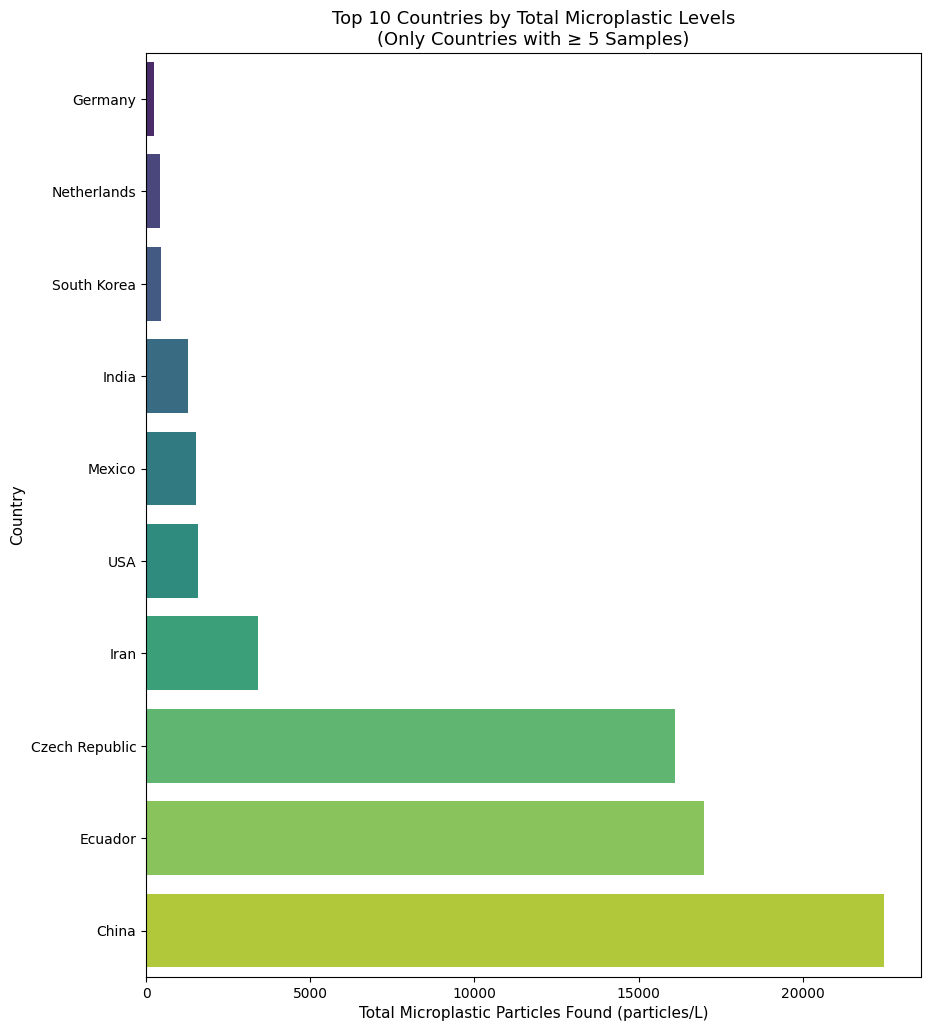

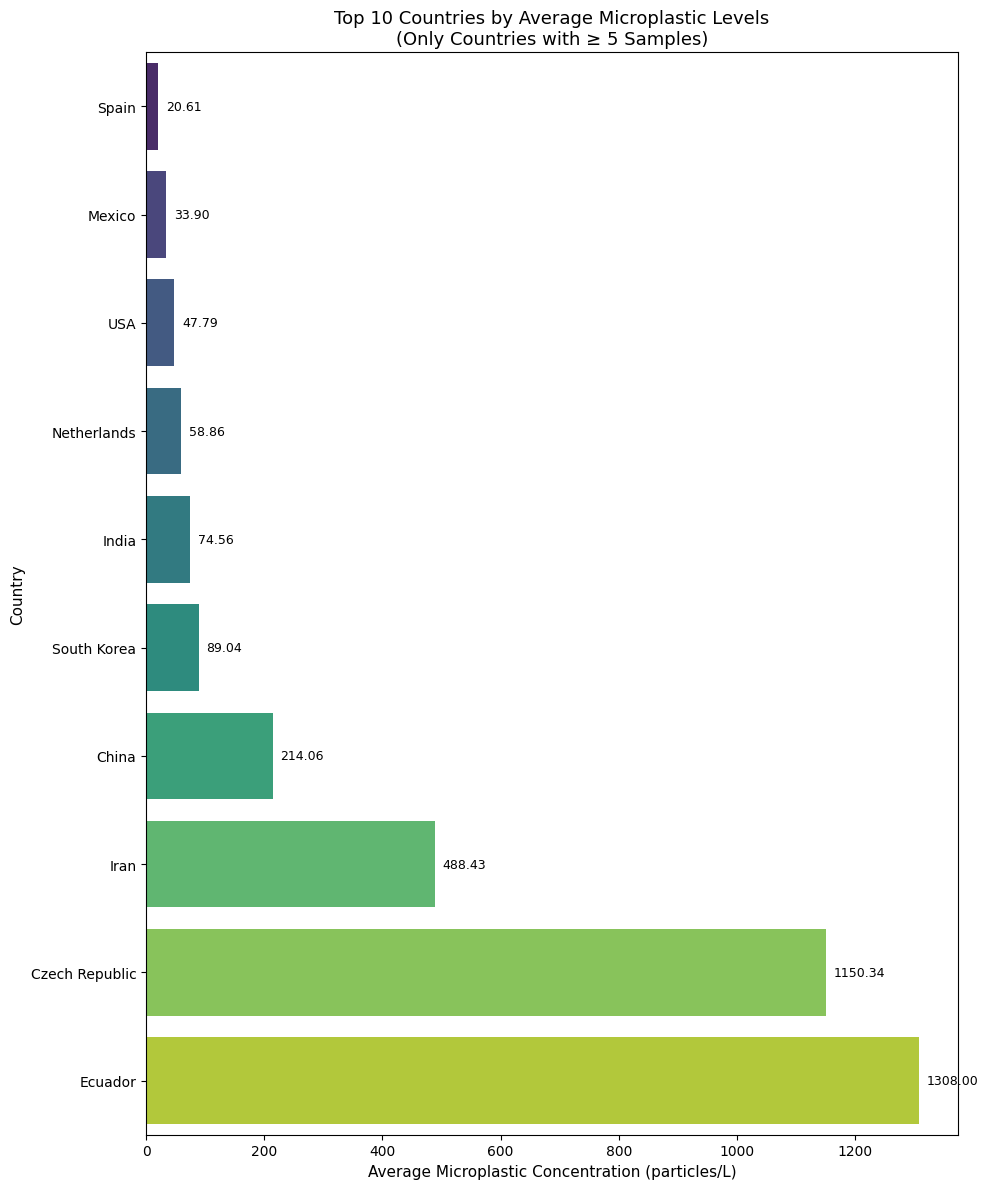

KeyError: 'total_std_concentration'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Concentration' is numeric
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

# Drop rows with missing concentration or unit
df_clean = df.dropna(subset=['Concentration', 'Concentration_Units'])

def convert_concentration(value, unit):
    conversion_factors = {
        'particles/L': 1,
        'particles/0.33 L': 1 / 0.33,
        'particles/50 L': 1 / 50,
        'particles/mL': 1000,
        'particles/m3': 1 / 1000
    }
    if np.isnan(value) or unit not in conversion_factors:
        return np.nan
    else:
        return value * conversion_factors[unit]

# Standardize concentration
df_clean['Concentration_std'] = df_clean.apply(
    lambda row: convert_concentration(row['Concentration'], row['Concentration_Units']),
    axis=1
)

# Group by country and sum the total concentration
country_stats = df_clean.groupby('Countries').agg(
    total_std_concentration=('Concentration_std', 'sum'),
    sample_count=('Concentration_std', 'count')
).reset_index()

# Filter to countries with at least 5 samples
country_stats = country_stats[country_stats['sample_count'] >= 5]

# Get top 10 by total concentration
top10 = country_stats.sort_values(by='total_std_concentration', ascending=False).head(10)
top10 = top10.sort_values(by='total_std_concentration', ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 12))
ax = sns.barplot(data=top10, x='total_std_concentration', y='Countries', palette='viridis')

plt.xlabel('Total Microplastic Particles Found (particles/L)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Countries by Total Microplastic Levels\n(Only Countries with ≥ 5 Samples)', fontsize=13)

# Add labelsimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Concentration' is numeric
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

# Drop rows with missing concentration or unit
df_clean = df.dropna(subset=['Concentration', 'Concentration_Units'])

def convert_concentration(value, unit):
    conversion_factors = {
        'particles/L': 1,
        'particles/0.33 L': 1 / 0.33,
        'particles/50 L': 1 / 50,
        'particles/mL': 1000,
        'particles/m3': 1 / 1000
    }
    if np.isnan(value) or unit not in conversion_factors:
        return np.nan
    else:
        return value * conversion_factors[unit]

# Standardize concentration
df_clean['Concentration_std'] = df_clean.apply(
    lambda row: convert_concentration(row['Concentration'], row['Concentration_Units']),
    axis=1
)

# Group by country and calculate average concentration
country_stats = df_clean.groupby('Countries').agg(
    avg_std_concentration=('Concentration_std', 'mean'),
    sample_count=('Concentration_std', 'count')
).reset_index()

# Filter to countries with at least 5 samples
country_stats = country_stats[country_stats['sample_count'] >= 5]

# Get top 10 countries by average concentration
top10 = country_stats.sort_values(by='avg_std_concentration', ascending=False).head(10)
top10 = top10.sort_values(by='avg_std_concentration', ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 12))
ax = sns.barplot(data=top10, x='avg_std_concentration', y='Countries', palette='viridis')

plt.xlabel('Average Microplastic Concentration (particles/L)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Countries by Average Microplastic Levels\n(Only Countries with ≥ 5 Samples)', fontsize=13)

# Add labels
max_val = top10['avg_std_concentration'].max()
for patch in ax.patches:
    width = patch.get_width()
    ax.text(width + (max_val * 0.01), 
            patch.get_y() + patch.get_height()/2, 
            f'{width:.2f}', 
            va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()
max_val = top10['total_std_concentration'].max()
for patch in ax.patches:
    width = patch.get_width()
    ax.text(width + (max_val * 0.01), 
            patch.get_y() + patch.get_height()/2, 
            f'{width:.2f}', 
            va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_3705/2370062967.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Concentration_std'] = df_clean.apply(


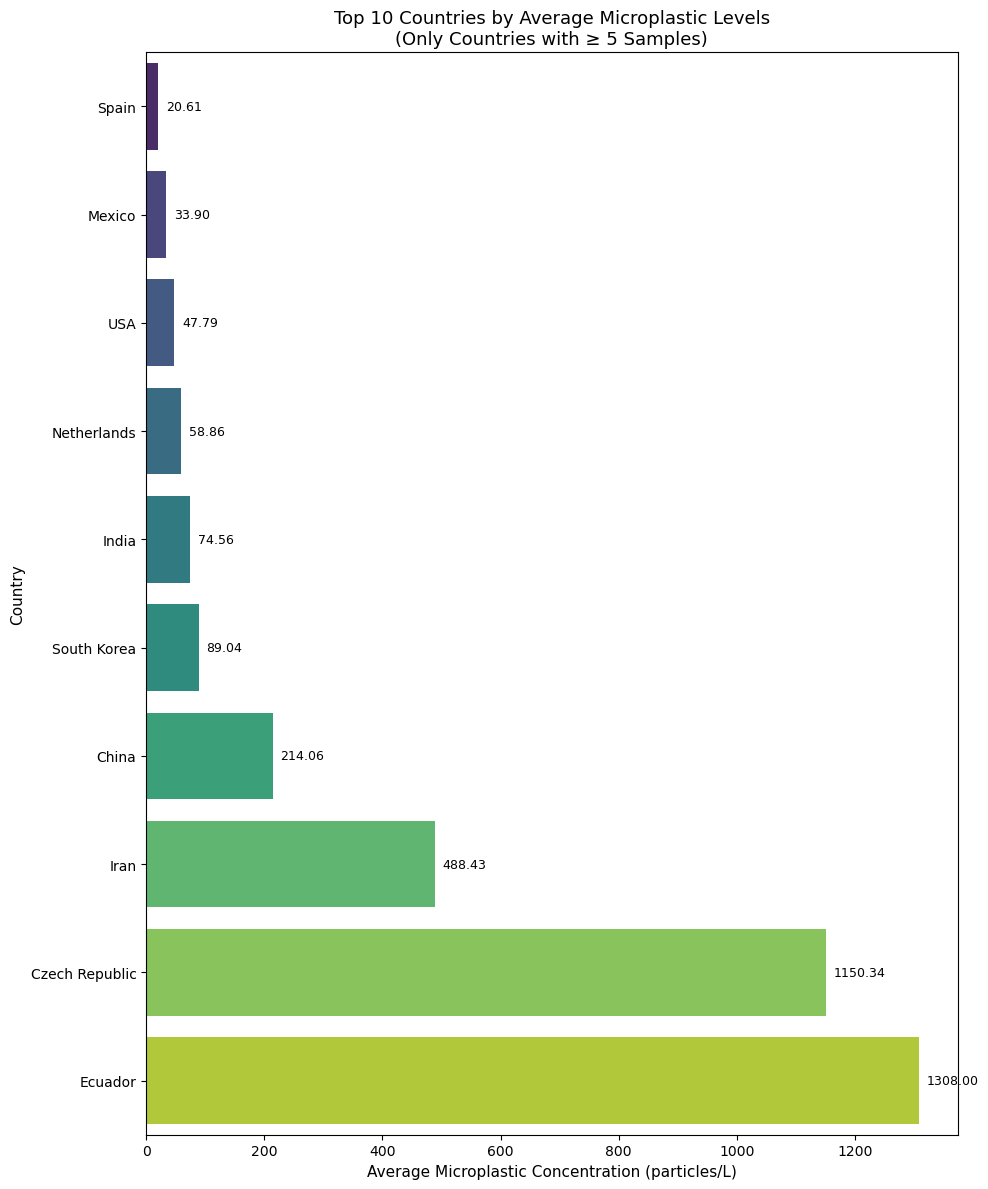

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Concentration' is numeric
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')

# Drop rows with missing concentration or unit
df_clean = df.dropna(subset=['Concentration', 'Concentration_Units'])

def convert_concentration(value, unit):
    conversion_factors = {
        'particles/L': 1,
        'particles/0.33 L': 1 / 0.33,
        'particles/50 L': 1 / 50,
        'particles/mL': 1000,
        'particles/m3': 1 / 1000
    }
    if np.isnan(value) or unit not in conversion_factors:
        return np.nan
    else:
        return value * conversion_factors[unit]

# Standardize concentration
df_clean['Concentration_std'] = df_clean.apply(
    lambda row: convert_concentration(row['Concentration'], row['Concentration_Units']),
    axis=1
)

# Group by country and calculate average concentration
country_stats = df_clean.groupby('Countries').agg(
    avg_std_concentration=('Concentration_std', 'mean'),
    sample_count=('Concentration_std', 'count')
).reset_index()

# Filter to countries with at least 5 samples
country_stats = country_stats[country_stats['sample_count'] >= 5]

# Get top 10 countries by average concentration
top10 = country_stats.sort_values(by='avg_std_concentration', ascending=False).head(10)
top10 = top10.sort_values(by='avg_std_concentration', ascending=True).reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 12))
ax = sns.barplot(data=top10, x='avg_std_concentration', y='Countries', palette='viridis')

plt.xlabel('Average Microplastic Concentration (particles/L)', fontsize=11)
plt.ylabel('Country', fontsize=11)
plt.title('Top 10 Countries by Average Microplastic Levels\n(Only Countries with ≥ 5 Samples)', fontsize=13)

# Add labels
max_val = top10['avg_std_concentration'].max()
for patch in ax.patches:
    width = patch.get_width()
    ax.text(width + (max_val * 0.01), 
            patch.get_y() + patch.get_height()/2, 
            f'{width:.2f}', 
            va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

### Count of Sample By Filtration Method  (USA vs Germany)

### Microplastic Concentration by Filtration Method

In [ ]:
df.columns

Index(['Unnamed: 0', 'DOI', 'Sample_ID', 'Location', 'Countries', 'Source',
       'Concentration', 'Concentration_Units', 'Approximate_Latitude',
       'Approximate_Longitude', 'Sample_device_and_deployment_methods',
       'Digestion', 'Filtration', 'Filter_Size',
       'Microplastic_Identification_Method', 'Spectral_Analysis', 'Controls'],
      dtype='object')

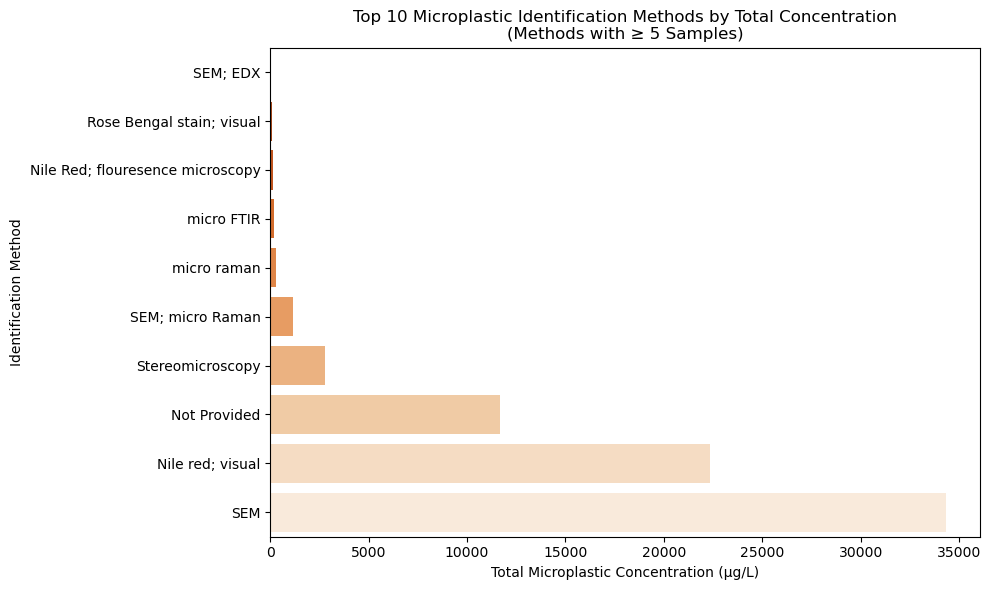

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df = df[~df['Location'].isnull()]
df = df.dropna(subset=['Approximate_Latitude', 'Approximate_Longitude'])
df = df.copy()
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration'])  # Remove rows where concentration couldn't be converted

# Rename column for clarity
df = df.rename(columns={'Microplastic_Identification_Method': 'Identification_Method'})

# Group by method and calculate total concentration and sample count
method_stats = df.groupby('Identification_Method').agg(
    total_concentration=('Concentration', 'sum'),
    sample_count=('Concentration', 'count')
).reset_index()

# Keep only methods with at least 5 samples
method_stats = method_stats[method_stats['sample_count'] >= 5]

# Sort by total concentration and keep top 10
top10_methods = method_stats.sort_values(by='total_concentration', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top10_methods.sort_values(by='total_concentration'),  # sorted for clean display
    x='total_concentration',
    y='Identification_Method',
    palette='Oranges_r'
)
plt.xlabel("Total Microplastic Concentration (µg/L)")
plt.ylabel("Identification Method")
plt.title("Top 10 Microplastic Identification Methods by Total Concentration\n(Methods with ≥ 5 Samples)")
plt.tight_layout()
plt.show()

### Average Microplastic Concentration by Filtration Method  (USA vs Germany)

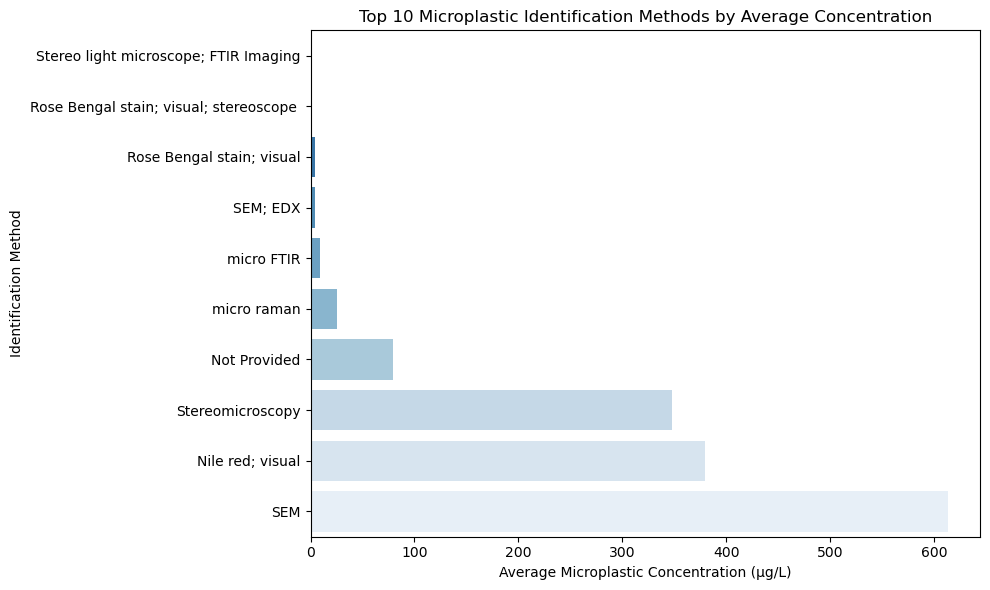

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df = df[~df['Location'].isnull()]
df = df.dropna(subset=['Approximate_Latitude', 'Approximate_Longitude'])
df = df.copy()
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration'])  # Remove rows where concentration couldn't be converted

# Rename column for clarity if needed (optional)
df = df.rename(columns={'Microplastic_Identification_Method': 'Identification_Method'})

# Get top 10 most common methods
top_methods = df['Identification_Method'].value_counts().head(10).index
filtered_df = df[df['Identification_Method'].isin(top_methods)]

# Group and compute average concentration
mean_conc = filtered_df.groupby('Identification_Method')['Concentration'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_conc.values, y=mean_conc.index, palette='Blues_r')
plt.xlabel("Average Microplastic Concentration (µg/L)")
plt.ylabel("Identification Method")
plt.title("Top 10 Microplastic Identification Methods by Average Concentration")
plt.tight_layout()
plt.show()

### Filtration Method vs. Concentration

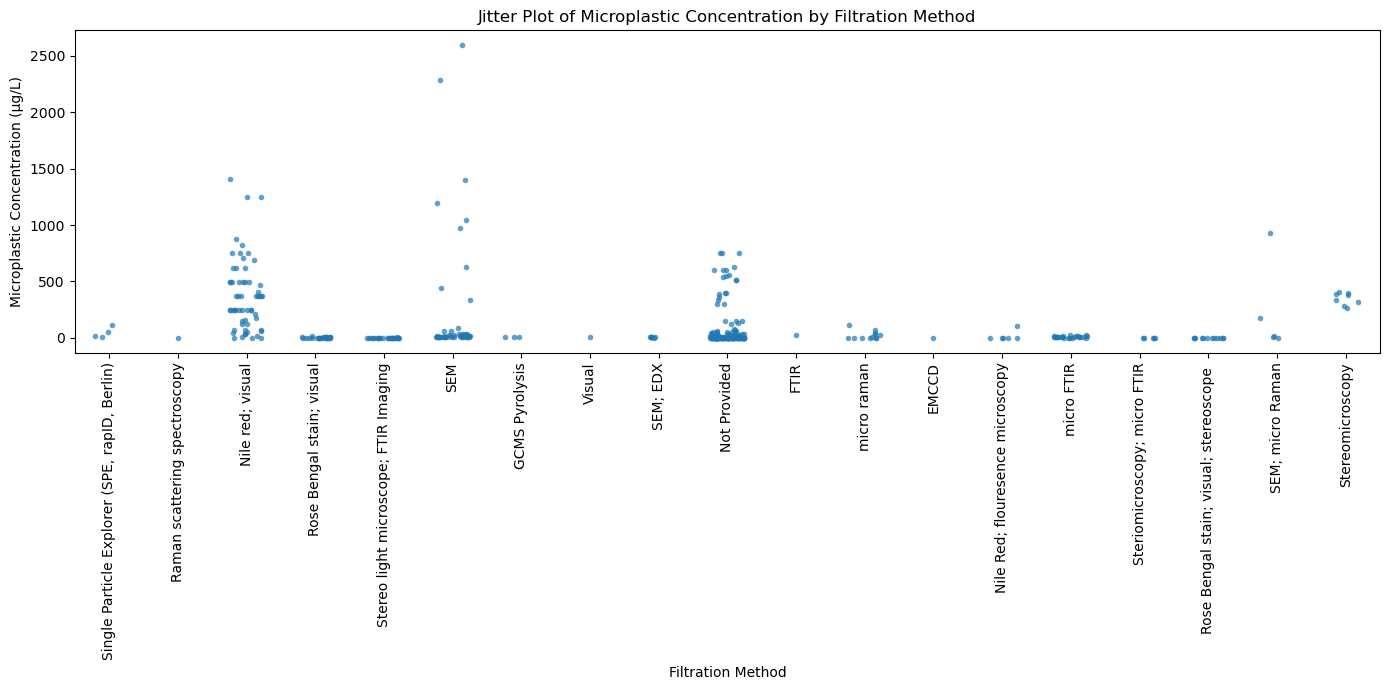

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df = df[~df['Location'].isnull()]
df = df.dropna(subset=['Approximate_Latitude', 'Approximate_Longitude'])
df = df.copy()
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration'])  # Remove rows where concentration couldn't be converted

# Drop rows without filtration method info
df = df.dropna(subset=['Microplastic_Identification_Method'])

# Filter out extremely high concentrations to reduce skew (optional)
df = df[df['Concentration'] < df['Concentration'].quantile(0.99)]  # Keep bottom 99% only

# Plot
plt.figure(figsize=(14, 7))
sns.stripplot(data=df, x= 'Microplastic_Identification_Method', y='Concentration', jitter=0.25, size=4, alpha=0.7)
plt.xticks(rotation=90)
plt.xlabel("Filtration Method")
plt.ylabel("Microplastic Concentration (µg/L)")
plt.title("Jitter Plot of Microplastic Concentration by Filtration Method")
plt.tight_layout()
plt.show()

 ### Proportion of Effective vs. Ineffective Filters by Country

/var/folders/t_/099k0vbd0vnbh2w_3z_42kww0000gp/T/ipykernel_3705/651377768.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Effectiveness'] = df_filtered['Concentration'].apply(


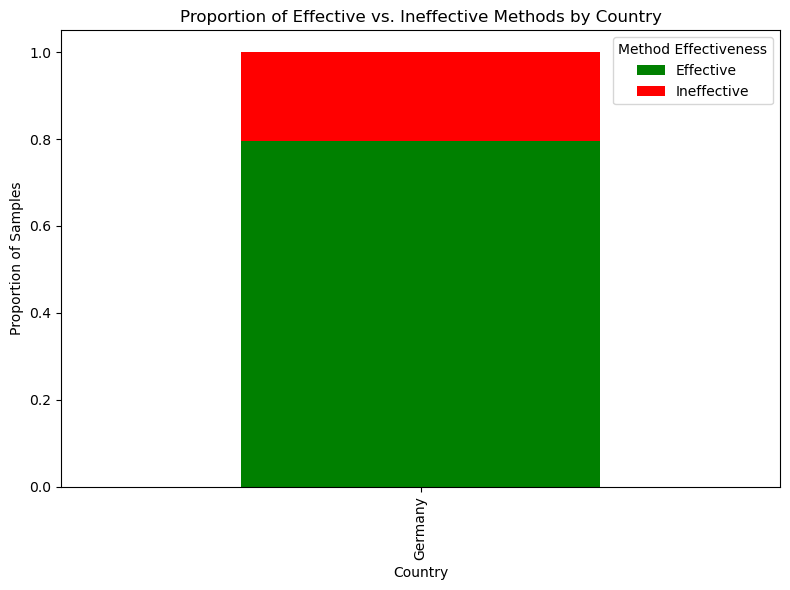

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv("Merged_Microplastic_Data.csv")
df['Concentration'] = pd.to_numeric(df['Concentration'], errors='coerce')
df = df.dropna(subset=['Concentration', 'Countries', 'Microplastic_Identification_Method'])

# Filter for Germany and USA
df_filtered = df[df['Countries'].isin(['Germany', 'United States'])]

# Define effectiveness: samples under 10 particles/L are "Effective"
threshold = 10
df_filtered['Effectiveness'] = df_filtered['Concentration'].apply(
    lambda x: 'Effective' if x < threshold else 'Ineffective'
)

# Group by country and effectiveness
summary = df_filtered.groupby(['Countries', 'Effectiveness']).size().unstack(fill_value=0)

# Convert to proportions
summary_prop = summary.div(summary.sum(axis=1), axis=0)

# Plot
summary_prop.plot(kind='bar', stacked=True, figsize=(8, 6), color=['green', 'red'])

plt.title('Proportion of Effective vs. Ineffective Methods by Country')
plt.ylabel('Proportion of Samples')
plt.xlabel('Country')
plt.legend(title='Method Effectiveness')
plt.tight_layout()
plt.show()